# Replace samples

In [355]:
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import numpy as np
import soundfile as sf
import glob
import os
import pandas as pd
from fileorganize import dir_to_df

In [359]:
pd.set_option('display.max_colwidth', None)

df = dir_to_df('./gorilla_final')
df = df.iloc[:15,:]
df

,relpath,fname
0,.,S01_I-said-anything_formal-breathiness_0_mono-breathiness_0.mp3
1,.,S01_I-said-anything_formal-breathiness_0_mono-breathiness_10.mp3
2,.,S01_I-said-anything_formal-breathiness_0_mono-breathiness_17.mp3
3,.,S01_I-said-anything_formal_mono-changesemitones_-2-raspiness_30.mp3
4,.,S01_I-said-anything_formal_mono-changesemitones_-4-raspiness_100.mp3
5,.,S01_they-shed-endlessly_casual-changesemitones_-2-raspiness_30_mono.mp3
6,.,S01_they-shed-endlessly_casual-changesemitones_-4-raspiness_100_mono.mp3
7,.,S01_they-shed-endlessly_casual_mono-breathiness_0.mp3
8,.,S01_they-shed-endlessly_casual_mono-breathiness_10.mp3
9,.,S01_they-shed-endlessly_casual_mono-breathiness_17.mp3


In [ ]:
df['fname_noext'] = df['fname'].str.replace(r'\.[^.]+$', '', regex=True)

## Sibilant file

In [360]:
df1 = dir_to_df('./sib_continua', fnpat = r'^p.*\.wav$')
df1

,relpath,fname
0,.,pscript_1.wav
1,.,pscript_2.wav
2,.,pscript_3.wav
3,.,pscript_4.wav
4,.,pscript_5.wav
5,.,pscript_6.wav
6,.,pscript_7.wav


In [805]:
sib_file = df1['fname'].iloc[2]

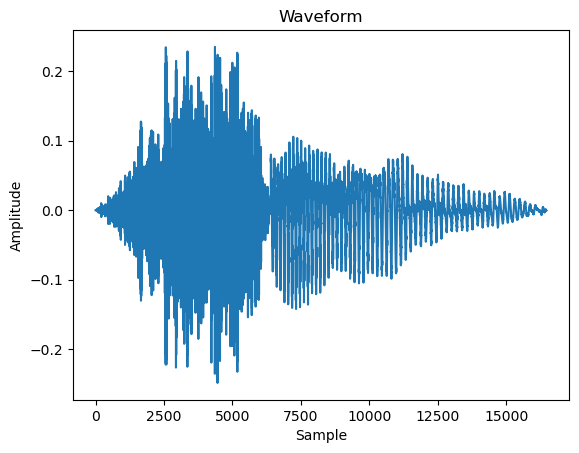

In [806]:
insert_audio = './sib_continua/' + sib_file

y, sr = librosa.load(insert_audio, sr=32000)

plt.plot(y)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

In [807]:
sr

32000

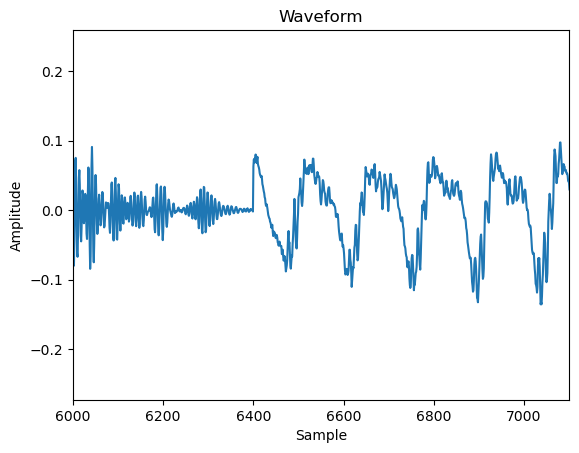

In [808]:
plt.plot(y)
plt.title("Waveform")
plt.xlabel("Sample")
plt.xlim([6000,7100])
plt.ylabel("Amplitude")
plt.show()

In [809]:
s = np.argmin(np.abs(y[0:1000]))
s_end = 6350 + np.argmin(np.abs(y[6350:6450]))
s_end

np.int64(6388)

In [810]:
y_sib = y[0:s_end]
Audio(data=y_sib, rate=sr)

## Carrier file

In [811]:
#? librosa.load

In [812]:
carrier_file = df['fname'].iloc[3]

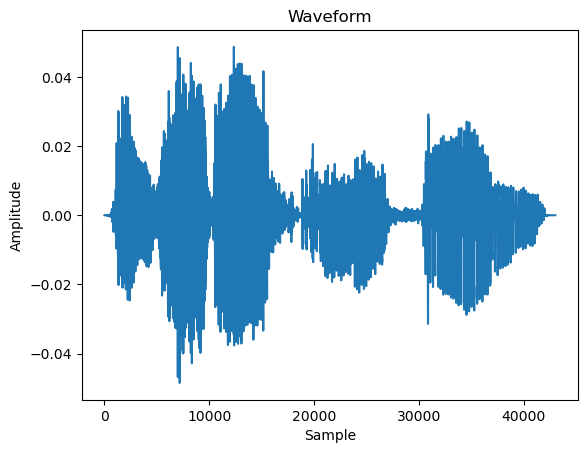

In [813]:
carrier_audio = './gorilla_final/' + carrier_file

y1, sr1 = librosa.load(carrier_audio, sr=32000)
y1 = y1[:43000]

plt.plot(y1)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

In [814]:
sr1

32000

(10000.0, 11000.0)

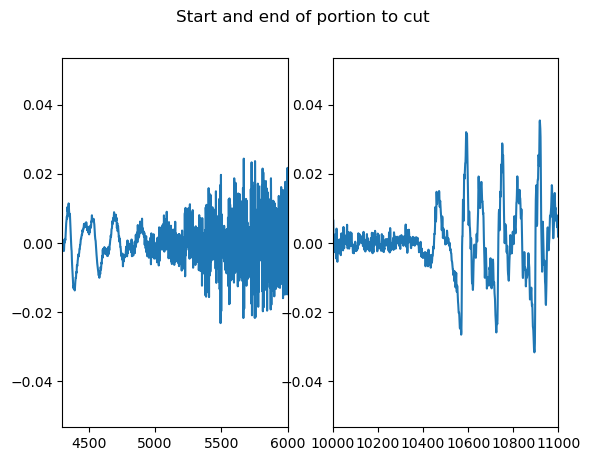

In [815]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Start and end of portion to cut')
ax1.plot(y1)
ax1.set_xlim([4300, 6000])
ax2.plot(y1)
ax2.set_xlim([10000, 11000])

In [816]:
cut1 = np.argmin(np.abs(y1[5000:5100]))
cut_start = cut1 + 5000
cut_start

np.int64(5051)

In [817]:
cut2 = np.argmin(np.abs(y1[10300:10400]))
cut_end = cut2 + 10300
cut_end

np.int64(10335)

In [818]:
y1_slice = y1[cut_start:cut_end]
Audio(data=y1_slice, rate=sr)

In [819]:
y1_new = y1
y1_new = np.delete(y1_new, np.s_[cut_start:cut_end])
Audio(data=y1_new, rate=sr)

In [820]:
y1_final = np.insert(y1_new, cut_start, y_sib)
Audio(data=y1_final, rate=sr)

In [804]:
sf.write('./gorilla_exp2/' + df['fname_noext'].iloc[3] + '_' + sib_file, y1_final, sr)

# Duplicate w/ gap

In [209]:
input_dir  = './gorilla_exp2'
output_dir = './gorilla_exp2'
os.makedirs(output_dir, exist_ok=True)

for input_path in glob.glob(os.path.join(input_dir, '*.mp3')):
    # load your signal
    y1_new, sr = librosa.load(input_path, sr=None)

    # build the combined signal
    num_samples = int(0.5 * sr)
    silence     = np.zeros(num_samples, dtype=np.float32)
    combined    = np.concatenate([y1_new, silence, y1_new])

    # derive the output filename from the input:
    base          = os.path.splitext(os.path.basename(input_path))[0]
    output_path   = os.path.join(output_dir, base + '.mp3')

    # save to disk
    sf.write(output_path, combined, sr)
    print(f"Saved: {output_path}")

Saved: ./gorilla_final/practice.mp3
